In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def smoove(ax, y, smoothing_factor=50, color='C0', label=''):
    segments = y.unfold(0, size=smoothing_factor, step=1)
    mid = segments.mean(dim=-1)
    std = segments.std(dim=-1)

    x = torch.arange(y.size(0))[:-smoothing_factor+1]
    ax.plot(x, mid, color=color, label=label)
    ax.fill_between(x=x, y1=mid+std, y2=mid-std, color=color, alpha=0.2)

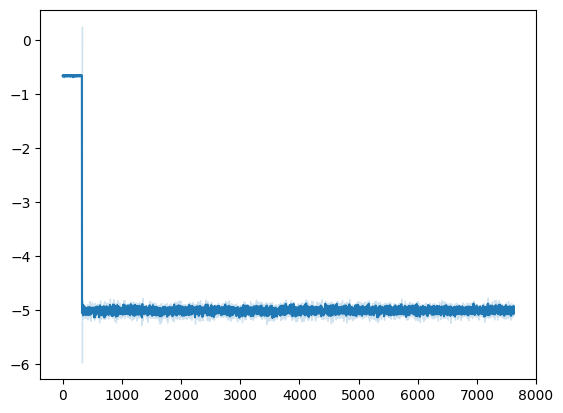

In [3]:
log = torch.load('../logs/node_mapper.pt', weights_only=True)
log = torch.tensor(log)
ax = plt.subplot()
smoove(ax, log, smoothing_factor=2)